In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (12.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [2]:
import json
import pandas as pd     #provides wide variety tools for data analysis,many inbuilt methods for grouping, combining and filtering data.
import numpy as np      #for some basic mathematical operations
from matplotlib import pyplot as plt #comprehensive library for creating static, animated, and interactive visualizations
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import  LabelEncoder
import seaborn as sns                #  high-level interface for drawing attractive and informative statistical graphics
import folium
from folium import plugins
import missingno as mnso
import warnings
warnings.filterwarnings('ignore')

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'NanumGothic'

pd.pandas.set_option('display.max_columns',None)
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
def datainfo(data):
    temp_ps = pd.DataFrame(index=data.columns)
    temp_ps['DataType'] = data.dtypes
    temp_ps["Non-null_Values"] = data.count()
    temp_ps['Unique_Values'] = data.nunique()
    temp_ps['NaN_Values'] = data.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(data))*100 
    return temp_ps

In [5]:
seodaemunAndmapo = pd.read_csv('/content/drive/MyDrive/데이터 처리/seodaemunAndmapo.csv')

In [6]:
#seodaemunAndmapo = df[(df['소재지(위치)'] == '마포구') | (df['소재지(위치)'] == '서대문구')]

In [7]:
#seodaemunAndmapo.to_csv('seodaemunAndmapo.csv')

In [8]:
seodaemunAndmapo.info() #9401개의 데이터

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972800 entries, 0 to 972799
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    972800 non-null  int64  
 1   Unnamed: 0.1  972800 non-null  int64  
 2   대여일자          972800 non-null  object 
 3   대여시간          972800 non-null  int64  
 4   대여소번호         972800 non-null  int64  
 5   이용건수          972800 non-null  float64
 6   이동거리          972799 non-null  float64
 7   사용시간          972799 non-null  float64
 8   월             972800 non-null  int64  
 9   일             972800 non-null  int64  
 10  요일            972800 non-null  int64  
 11  일시            972800 non-null  object 
 12  기온(°C)        972800 non-null  float64
 13  강수량(mm)       972800 non-null  float64
 14  풍속(m/s)       972800 non-null  float64
 15  습도(%)         972800 non-null  int64  
 16  소재지(위치)       972800 non-null  object 
 17  대여소별 자전거 대수   972800 non-null  float64
dtypes: f

In [9]:
seodaemunAndmapo.head()

,Unnamed: 0,Unnamed: 0.1,대여일자,대여시간,대여소번호,이용건수,이동거리,사용시간,월,일,요일,일시,기온(°C),강수량(mm),풍속(m/s),습도(%),소재지(위치),대여소별 자전거 대수
0,26268,26268,2021-01-01 00:00:00,0,192,1.0,908.98,7.0,1,1,4,2021-01-01 00:00:00,-8.3,0.0,1.8,66,서대문구,10.0
1,26269,26269,2021-01-01 00:00:00,13,192,1.0,460.03,11.0,1,1,4,2021-01-01 13:00:00,-0.2,0.0,3.0,56,서대문구,10.0
2,26270,26270,2021-01-01 00:00:00,13,192,1.0,0.00,25.0,1,1,4,2021-01-01 13:00:00,-0.2,0.0,3.0,56,서대문구,10.0
3,26271,26271,2021-01-01 00:00:00,15,192,1.0,0.00,5.0,1,1,4,2021-01-01 15:00:00,1.2,0.0,2.6,52,서대문구,10.0
4,26272,26272,2021-01-01 00:00:00,18,192,1.0,0.00,125.0,1,1,4,2021-01-01 18:00:00,-1.4,0.0,2.1,68,서대문구,10.0


In [10]:
seodaemunAndmapo.drop(columns=['Unnamed: 0'],inplace=True)
seodaemunAndmapo.drop(columns=['Unnamed: 0.1'],inplace=True)

In [11]:
seodaemunAndmapo.drop(columns=['대여일자'], inplace=True)
seodaemunAndmapo.drop(columns=['일시'], inplace=True)
seodaemunAndmapo.drop(columns=['대여소번호'], inplace=True)
seodaemunAndmapo.drop(columns=['이동거리'], inplace=True)
seodaemunAndmapo.drop(columns=['사용시간'], inplace=True)

In [12]:
seodaemunAndmapo.head()

,대여시간,이용건수,월,일,요일,기온(°C),강수량(mm),풍속(m/s),습도(%),소재지(위치),대여소별 자전거 대수
0,0,1.0,1,1,4,-8.3,0.0,1.8,66,서대문구,10.0
1,13,1.0,1,1,4,-0.2,0.0,3.0,56,서대문구,10.0
2,13,1.0,1,1,4,-0.2,0.0,3.0,56,서대문구,10.0
3,15,1.0,1,1,4,1.2,0.0,2.6,52,서대문구,10.0
4,18,1.0,1,1,4,-1.4,0.0,2.1,68,서대문구,10.0


In [13]:
cols = ['소재지(위치)', '월', '일', '대여시간', '요일', '기온(°C)', '풍속(m/s)', '강수량(mm)', '습도(%)']
seodaemunAndmapo = seodaemunAndmapo.groupby(cols)['이용건수'].agg(이용건수='sum').reset_index()
seodaemunAndmapo.head()

,소재지(위치),월,일,대여시간,요일,기온(°C),풍속(m/s),강수량(mm),습도(%),이용건수
0,마포구,1,1,0,4,-8.3,1.8,0.0,66,20.0
1,마포구,1,1,1,4,-8.7,2.4,0.0,68,19.0
2,마포구,1,1,2,4,-9.1,1.6,0.0,69,17.0
3,마포구,1,1,3,4,-9.3,1.1,0.0,70,11.0
4,마포구,1,1,4,4,-9.3,0.3,0.0,71,6.0


In [14]:
datainfo(seodaemunAndmapo)

,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
소재지(위치),object,9401,2,0,0.0
월,int64,9401,12,0,0.0
일,int64,9401,31,0,0.0
대여시간,int64,9401,24,0,0.0
요일,int64,9401,7,0,0.0
기온(°C),float64,9401,491,0,0.0
풍속(m/s),float64,9401,75,0,0.0
강수량(mm),float64,9401,64,0,0.0
습도(%),int64,9401,82,0,0.0
이용건수,float64,9401,655,0,0.0


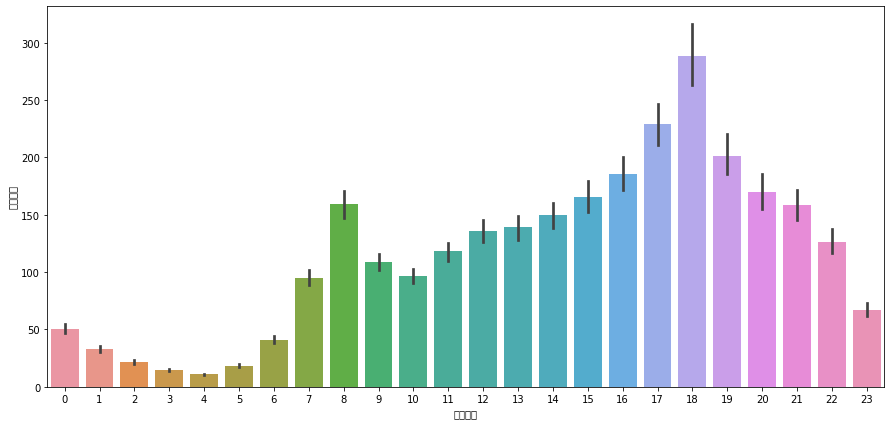

In [15]:
def barplots(x,y):
    plt.figure(figsize=(15,7))
    sns.set_palette("husl")
    sns.barplot(x=x,y=y,data=seodaemunAndmapo);
barplots('대여시간','이용건수') #역시 출근시간:8시, 퇴근시간:18시정도에 이용건수가 증가함.

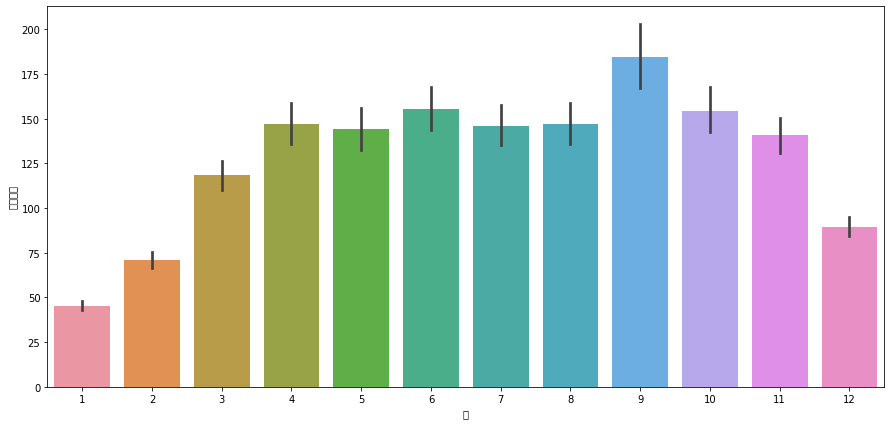

In [16]:
barplots('월', '이용건수') #겨울에 낮음

Text(0.5, 1.0, 'cube root')

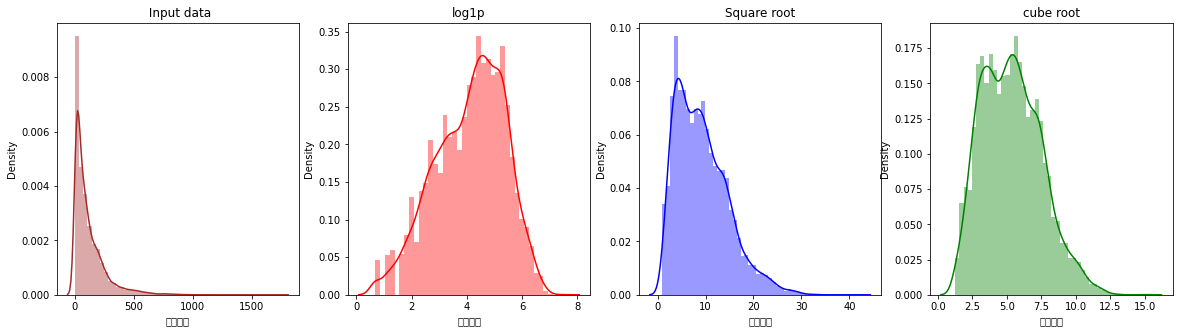

In [17]:
#apply diffrent tranformation technique and checking data distributation
fig,axes = plt.subplots(1,4,figsize=(20,5))
sns.distplot((seodaemunAndmapo['이용건수']),ax=axes[0],color='brown').set_title(" Input data")
sns.distplot(np.log1p(seodaemunAndmapo['이용건수']+0.0000001),ax=axes[1],color='red').set_title("log1p") #transform only posible in positive value and >0 value so add 0.0000001 in data #로그스케일 적용
sns.distplot(np.sqrt(seodaemunAndmapo['이용건수']),ax=axes[2], color='blue').set_title("Square root")
sns.distplot(np.cbrt(seodaemunAndmapo['이용건수']*2),ax=axes[3], color='green').set_title("cube root")

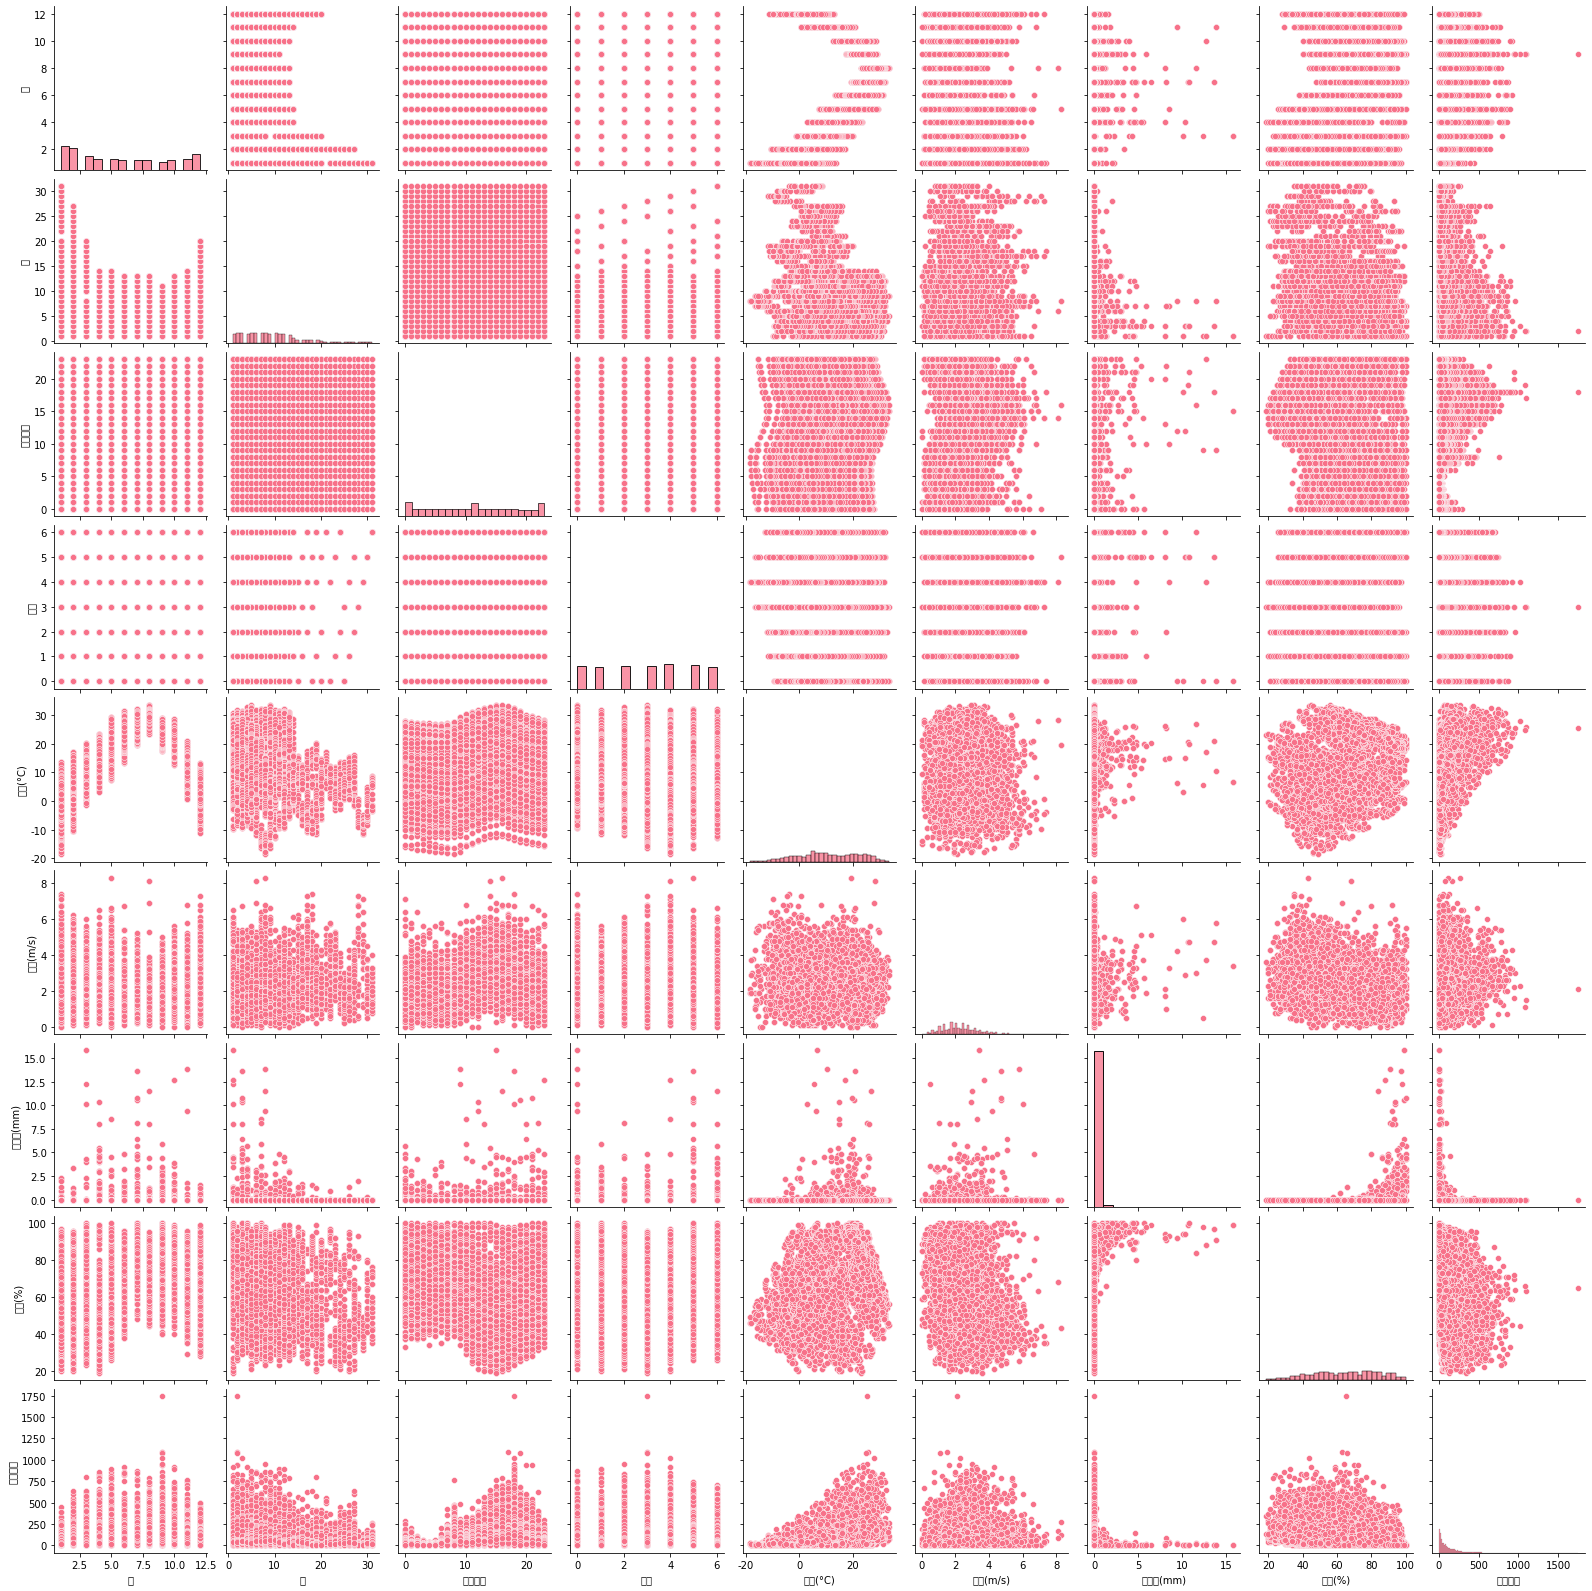

In [18]:
sns.pairplot(seodaemunAndmapo)
plt.show()

In [19]:
# 소재지 (위치) 값 정수로 변경
# 마포구:1, 서대문구:2
seodaemunAndmapo['소재지(위치)']=seodaemunAndmapo['소재지(위치)'].replace(['마포구','서대문구'],[1,2])
seodaemunAndmapo.astype({'소재지(위치)':'int'})
print(seodaemunAndmapo.head())
print(seodaemunAndmapo.dtypes)

   소재지(위치)  월  일  대여시간  요일  기온(°C)  풍속(m/s)  강수량(mm)  습도(%)  이용건수
0        1  1  1     0   4    -8.3      1.8      0.0     66  20.0
1        1  1  1     1   4    -8.7      2.4      0.0     68  19.0
2        1  1  1     2   4    -9.1      1.6      0.0     69  17.0
3        1  1  1     3   4    -9.3      1.1      0.0     70  11.0
4        1  1  1     4   4    -9.3      0.3      0.0     71   6.0
소재지(위치)      int64
월            int64
일            int64
대여시간         int64
요일           int64
기온(°C)     float64
풍속(m/s)    float64
강수량(mm)    float64
습도(%)        int64
이용건수       float64
dtype: object


In [20]:
#StandarScaler적용
#std_scaler = StandardScaler()
#fitted = std_scaler.fit(seodaemunAndmapo)
## 출력 결과
## array([4.46000000e+02, 3.83838384e-01, 2.30864198e+00, 2.93615825e+01,
##        5.23007856e-01, 3.81593715e-01, 3.22042080e+01])
#output = std_scaler.transform(seodaemunAndmapo)
#output = pd.DataFrame(output, columns=seodaemunAndmapo.columns, index=list(seodaemunAndmapo.index.values))
#print(output.head())

In [21]:
#apply diffrent tranformation technique and checking data distributation
#fig,axes = plt.subplots(1,4,figsize=(20,5))
#sns.distplot((output['이용건수']),ax=axes[0],color='brown').set_title(" Input data")
#sns.distplot(np.log1p(output['이용건수']+0.0000001),ax=axes[1],color='red').set_title("log1p") #transform only posible in positive value and >0 value so add 0.0000001 in data
#sns.distplot(np.sqrt(output['이용건수']),ax=axes[2], color='blue').set_title("Square root")
#sns.distplot(np.cbrt(output['이용건수']*2),ax=axes[3], color='green').set_title("cube root")

In [22]:
#로그스케일적용
log_df = np.log1p(seodaemunAndmapo)

Text(0.5, 1.0, ' Input data')

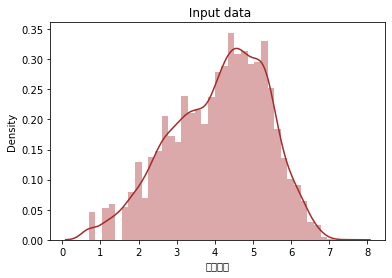

In [23]:
sns.distplot((log_df['이용건수']),color='brown').set_title(" Input data")

In [24]:
drop_columns=['이용건수']

X=seodaemunAndmapo.drop(drop_columns,axis=1)
y=seodaemunAndmapo['이용건수']

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(f'The shape of the train and test set for the independent variables are : X_train = {X_train.shape}, X_test = {X_test.shape}')
print(f'The shape of the train and test set for the dependent variables are : y_train = {y_train.shape}, y_test = {y_test.shape}')

The shape of the train and test set for the independent variables are : X_train = (7520, 9), X_test = (1881, 9)
The shape of the train and test set for the dependent variables are : y_train = (7520,), y_test = (1881,)


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

def print_score(name, score):
  print(f'{name}: {sum(score) / len(score)}')

#Linear regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# random forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

#Gradient Boosting
gf_model = GradientBoostingRegressor()
gf_model.fit(X_train,y_train)

lr_scores = cross_val_score(lr_model, X_test, y_test, cv = 5)
gf_scores = cross_val_score(gf_model, X_test, y_test, cv=5)
rf_scores = cross_val_score(rf_model, X_test, y_test, cv=5)

In [27]:
print_score('Linear Regression ',lr_scores)
print_score('Random forest ',rf_scores)
print_score('Gradient Boosting ', gf_scores)

Linear Regression : 0.505368741803965
Random forest : 0.838163280261315
Gradient Boosting : 0.8149628003076004


## Random forest Grid Search

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [29]:
param_grid = {
    'max_depth': [10, 20]
}
grid_rf = GridSearchCV(rf_model, param_grid ,scoring='r2', cv = 5)
grid_rf.fit(X_train, y_train)
y_pred = grid_rf.predict(X_test)
print("Best Score:",grid_rf.best_score_)

Best Score: 0.8870120158362818


In [30]:
param_grid = {
    'max_features': [2, 3]
}
grid_rf = GridSearchCV(rf_model, param_grid ,scoring='r2', cv = 5)
grid_rf.fit(X_train, y_train)
y_pred = grid_rf.predict(X_test)
print("Best Score:",grid_rf.best_score_)

Best Score: 0.878232902007736


In [31]:
param_grid = {
    'min_samples_leaf': [3, 4, 5]
}
grid_rf = GridSearchCV(rf_model, param_grid ,scoring='r2', cv = 5)
grid_rf.fit(X_train, y_train)
y_pred = grid_rf.predict(X_test)
print("Best Score:",grid_rf.best_score_)

Best Score: 0.8818037741658269


In [32]:
param_grid = {
    'min_samples_split': [8, 10, 12]
}
grid_rf = GridSearchCV(rf_model, param_grid ,scoring='r2', cv = 5)
grid_rf.fit(X_train, y_train)
y_pred = grid_rf.predict(X_test)
print("Best Score:",grid_rf.best_score_)

Best Score: 0.8809295209337324


In [33]:
param_grid = {
    'n_estimators': [1, 20, 100]
}
grid_rf = GridSearchCV(rf_model, param_grid ,scoring='r2', cv = 5)
grid_rf.fit(X_train, y_train)
y_pred = grid_rf.predict(X_test)
print("Best Score:",grid_rf.best_score_)

Best Score: 0.889545635940391


In [34]:
param_grid = {
    'max_depth': [10, 20],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [1, 20, 100]
}
grid_rf = GridSearchCV(rf_model, param_grid ,scoring='r2', cv = 5)
grid_rf.fit(X_train, y_train)
y_pred = grid_rf.predict(X_test)
print("Best Score:",grid_rf.best_score_)

Best Score: 0.8568745468896248


In [47]:
param_grid = {
    'max_depth': [10, 20],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [1, 20, 100]
}
grid_rf = GridSearchCV(rf_model, param_grid ,scoring='neg_mean_squared_error', cv = 5)
grid_rf.fit(X_train, y_train)
y_pred = grid_rf.predict(X_test)
print("negative mean squared error:",grid_rf.best_score_)

negative mean squared error: -2577.407522391925


In [35]:
print("Best Parameter: ",grid_rf.best_params_)

Best Parameter:  {'max_depth': 20, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}


## Gradient Boosting GridSearch

In [36]:
param_grid = {
    'max_depth': [5, 10, 20]
}
grid_gb = GridSearchCV(gf_model, param_grid,scoring='r2', cv = 5)
grid_gb.fit(X_train, y_train)
y_pred2 = grid_gb.predict(X_test)
print("Best Score:",grid_gb.best_score_)

Best Score: 0.9100491915185346


In [37]:
param_grid = {
    'max_features': [2, 3]
}
grid_gb = GridSearchCV(gf_model, param_grid,scoring='r2', cv = 5)
grid_gb.fit(X_train, y_train)
y_pred2 = grid_gb.predict(X_test)
print("Best Score:",grid_gb.best_score_)

Best Score: 0.790463112213786


In [38]:
param_grid = {
    'min_samples_leaf': [3, 4, 5]
}
grid_gb = GridSearchCV(gf_model, param_grid,scoring='r2', cv = 5)
grid_gb.fit(X_train, y_train)
y_pred2 = grid_gb.predict(X_test)
print("Best Score:",grid_gb.best_score_)

Best Score: 0.8155425057545491


In [39]:
param_grid = {
    'min_samples_split': [8 ,10, 12]
}
grid_gb = GridSearchCV(gf_model, param_grid,scoring='r2', cv = 5)
grid_gb.fit(X_train, y_train)
y_pred2 = grid_gb.predict(X_test)
print("Best Score:",grid_gb.best_score_)

Best Score: 0.8154770942701264


In [40]:
param_grid = {
    'n_estimators': [1, 20, 100]
}
grid_gb = GridSearchCV(gf_model, param_grid,scoring='r2', cv = 5)
grid_gb.fit(X_train, y_train)
y_pred2 = grid_gb.predict(X_test)
print("Best Score:",grid_gb.best_score_)

Best Score: 0.8154491088270275


In [41]:
param_grid = {
    'max_depth': [5, 10, 20],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8 ,10, 12],
    'n_estimators': [1, 20, 100]
}
grid_gb = GridSearchCV(gf_model, param_grid,scoring='r2', cv = 5)
grid_gb.fit(X_train, y_train)
y_pred2 = grid_gb.predict(X_test)
print("Best Score:",grid_gb.best_score_)

Best Score: 0.9291022236483302


In [42]:
print("Best Parameter: ", grid_gb.best_params_)

Best Parameter:  {'max_depth': 10, 'max_features': 3, 'min_samples_leaf': 5, 'min_samples_split': 8, 'n_estimators': 100}


In [46]:
param_grid = {
    'max_depth': [5, 10, 20],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8 ,10, 12],
    'n_estimators': [1, 20, 100]
}
grid_gb = GridSearchCV(gf_model, param_grid,scoring='neg_mean_squared_error', cv = 5)
grid_gb.fit(X_train, y_train)
y_pred2 = grid_gb.predict(X_test)
print("negative mean squrred error:",grid_gb.best_score_)

negative mean squrred error: -1255.286201590767
